In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

Load dataset

In [52]:
data = pd.read_csv('/home/max/stayahead/analysis/datasets/current/ESM_1step_pred_wuhan_v1_b2b_03-07.csv')

Select numeric columns

In [60]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

In [61]:
numeric_df = numeric_df.drop(columns=['site', 'total_hydro', 'global_net_energy', 'bind', 'delta_bind', 'expr', 'delta_expr', 'confidence_bind', 'confidence_expr'])

In [62]:
numeric_df

,rmsd,tm_score,sasa,avg_hydro,plddt,local_net_energy,agmata,backbone,coil,disoMine,earlyFolding,helix,ppII,sheet,sidechain
0,14.374260,0.389291,18593.003567,-0.261451,23.136774,139676.850972,0.697046,0.862651,0.370015,0.112313,0.156687,0.259205,0.077831,0.369467,0.574108
1,14.326680,0.452471,16551.722910,-0.201134,23.600130,127902.469666,0.702672,0.865579,0.367718,0.100810,0.153600,0.257615,0.077149,0.374374,0.577779
2,13.841762,0.473718,16666.825161,-0.229705,23.638132,144509.666607,0.700964,0.859703,0.373451,0.113303,0.153154,0.246236,0.080313,0.374677,0.576041
3,14.231240,0.465446,16805.735473,-0.238171,23.314119,155615.740156,0.718144,0.860662,0.373359,0.106692,0.154415,0.246944,0.079528,0.374856,0.576303
4,12.710759,0.479605,17045.420919,-0.229705,23.933160,138857.040048,0.707738,0.859826,0.375215,0.113323,0.153544,0.243154,0.080662,0.374831,0.576210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,4.918191,0.744464,18173.109021,-0.199017,22.900778,161475.795880,0.737338,0.865918,0.367697,0.099867,0.148738,0.251267,0.077667,0.380605,0.578241
3701,12.684662,0.511268,17805.102142,-0.254044,23.438835,140811.543457,0.780964,0.862964,0.372333,0.110379,0.150390,0.250226,0.078959,0.372954,0.574385
3702,13.259047,0.381628,19130.631054,-0.252457,22.797673,151445.837867,0.663041,0.861615,0.372303,0.109149,0.154738,0.249369,0.079185,0.373897,0.575195
3703,12.101693,0.535861,18270.715202,-0.211716,22.609091,137124.675948,0.769364,0.863246,0.368487,0.106436,0.154497,0.257328,0.077969,0.372600,0.577272


Calculate std dev

In [65]:
std_devs_df = numeric_df.std()

In [66]:
std_devs_df.to_list()

[2.7516912135390217,
 0.08715178057230306,
 860.4098716658498,
 0.021940981469602067,
 0.699396062471042,
 10260.640794388713,
 0.1289864796348725,
 0.0033070540139095313,
 0.0024002397597676843,
 0.007181527445117089,
 0.0072372135091234215,
 0.004707338620948484,
 0.0012795431403163225,
 0.003351134935489009,
 0.0020820155839783782]

In [7]:
#AlphaFold
# features = ['rmsd', 'tm_score', 'sasa', 'avg_hydro', 'plddt', 'ep', 'iptm_ptm', 'iptm', 
#             'pDockQ/mpDockQ', 'average_interface_pae', 'average_interface_plddt', 'binding_energy', 
#             'Num_intf_residues', 'Polar', 'Hydrophobhic', 'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 
#             'int_solv_en', 'int_area', 'pi_score', 'agmata', 'backbone', 'coil', 'disoMine', 'earlyFolding', 
#             'helix', 'ppII', 'sheet', 'sidechain']
# std_devs = [1.170343, 0.000663, 39.805764, 0.021922, 0.414657, 9695.190055, 0.100971, 0.118206, 0.085886, 
#             1.056597, 4.883612, 570.929953, 10.871857, 0.111631, 0.109242, 0.064775, 20.179339, 0.127786, 
#             3.455840, 1.546584, 2.305929, 124.009791, 0.725142, 0.128986, 0.003307, 0.002400, 0.007182, 
#             0.007237, 0.004707, 0.001280, 0.003351, 0.002082]
#ESMFold
features = ['rmsd', 'tm_score', 'sasa', 'avg_hydro', 'plddt', 'local_net_energy','agmata', 'backbone', 'coil', 'disoMine', 'earlyFolding', 
            'helix', 'ppII', 'sheet', 'sidechain']
std_devs = [2.7516912135390217,
 0.08715178057230306,
 860.4098716658498,
 0.021940981469602067,
 0.699396062471042,
 10260.640794388713,
 0.1289864796348725,
 0.0033070540139095313,
 0.0024002397597676843,
 0.007181527445117089,
 0.0072372135091234215,
 0.004707338620948484,
 0.0012795431403163225,
 0.003351134935489009,
 0.0020820155839783782]

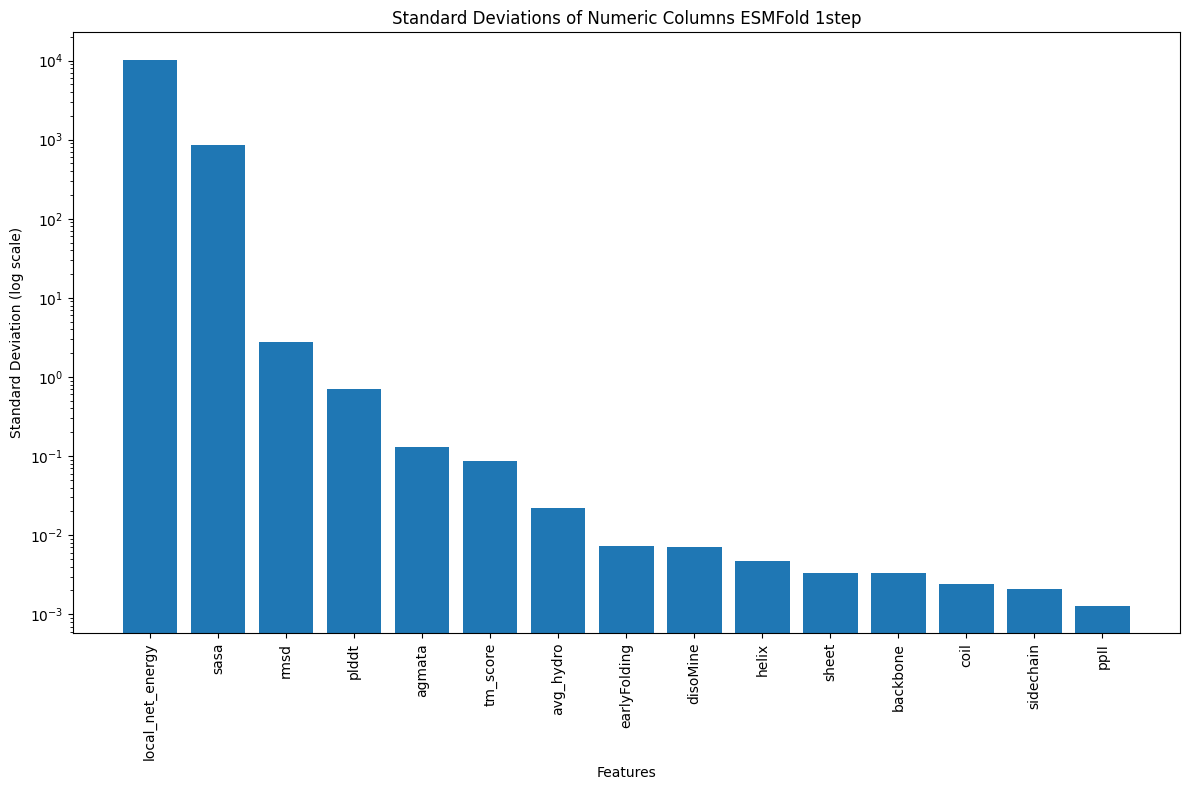

In [8]:
# Combine the features and std_devs into a list of tuples and sort by std_dev
sorted_data = sorted(zip(std_devs, features), reverse=True)

# Unzip the sorted list back into two lists
sorted_std_devs, sorted_features = zip(*sorted_data)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(sorted_features, sorted_std_devs)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Features')
plt.ylabel('Standard Deviation (log scale)')
plt.title('Standard Deviations of Numeric Columns ESMFold 1step')
plt.tight_layout()
plt.show()

In [ ]:
# , 1.164009, 1.163159, 1.034650, 1.034652, 0.511565, 0.511730
# , 'bind', 'delta_bind', 'expr', 'delta_expr', 'confidence_bind', 'confidence_expr'

Standardise data to make data suitable for plotting

In [68]:
# Apply logarithmic transformation
log_std_devs = np.log1p(std_devs_df)

In [46]:
log_std_devs = log_std_devs.tolist()

Bar Plot

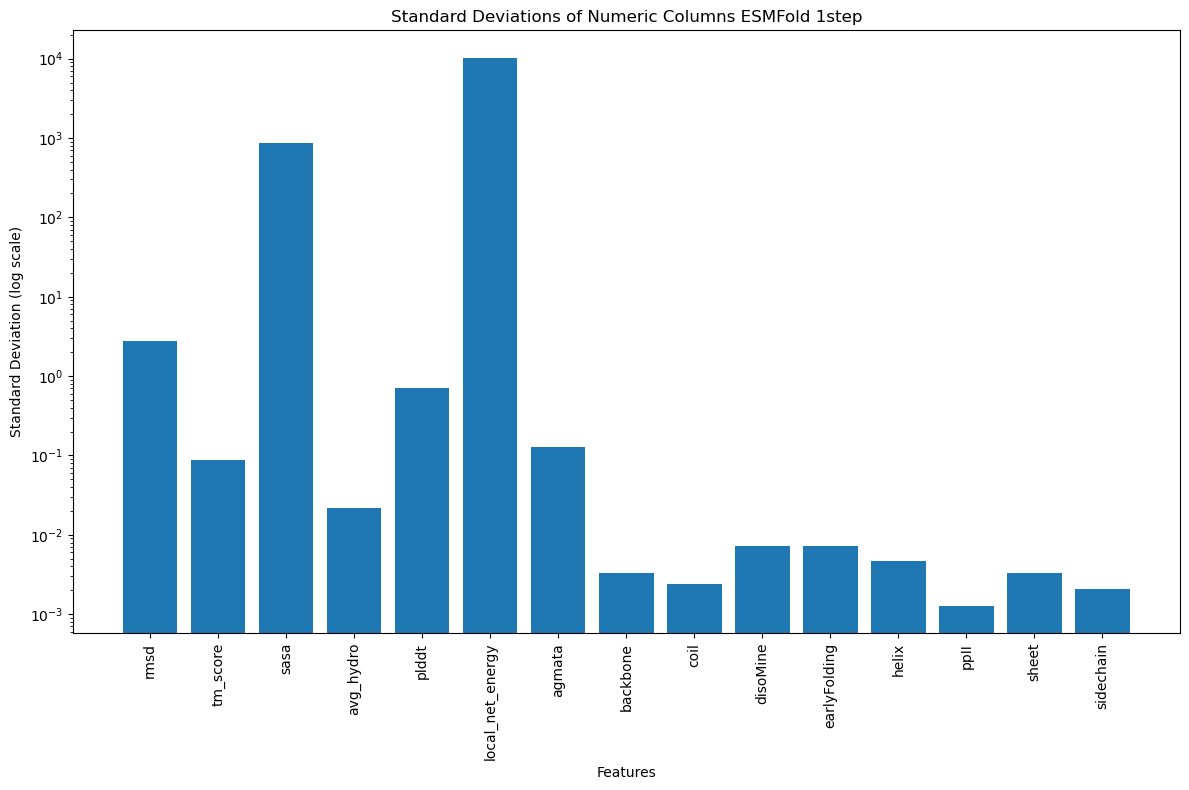

In [70]:
plt.figure(figsize=(12, 8))
plt.bar(features, std_devs)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Features')
plt.ylabel('Standard Deviation (log scale)')
plt.title('Standard Deviations of Numeric Columns ESMFold 1step')
plt.tight_layout()
plt.show()

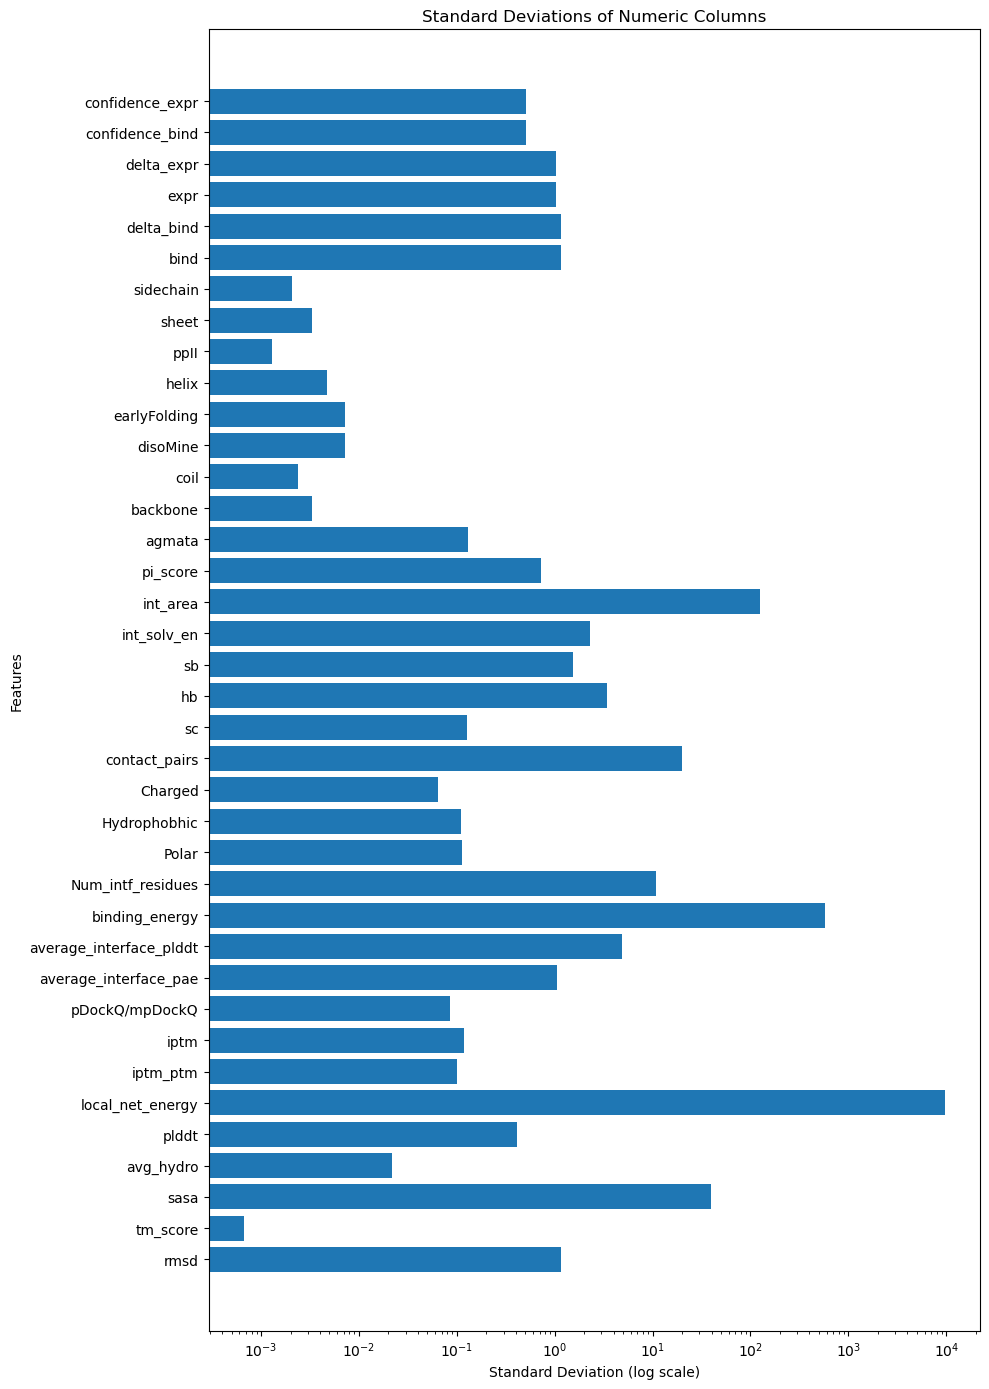

In [31]:
# Plotting
plt.figure(figsize=(10, 14))
plt.barh(features, std_devs)
plt.xscale('log')
plt.xlabel('Standard Deviation (log scale)')
plt.ylabel('Features')
plt.title('Standard Deviations of Numeric Columns')
plt.tight_layout()
plt.show()

Box Plot

In [47]:
# Creating a DataFrame
plot_data = {'Features': features, 'Standard Deviation': log_std_devs}
df_plot = pd.DataFrame(plot_data)
df_plot = df_plot.set_index('Features')

In [13]:
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/references/controls/control_metrics_AF.csv')

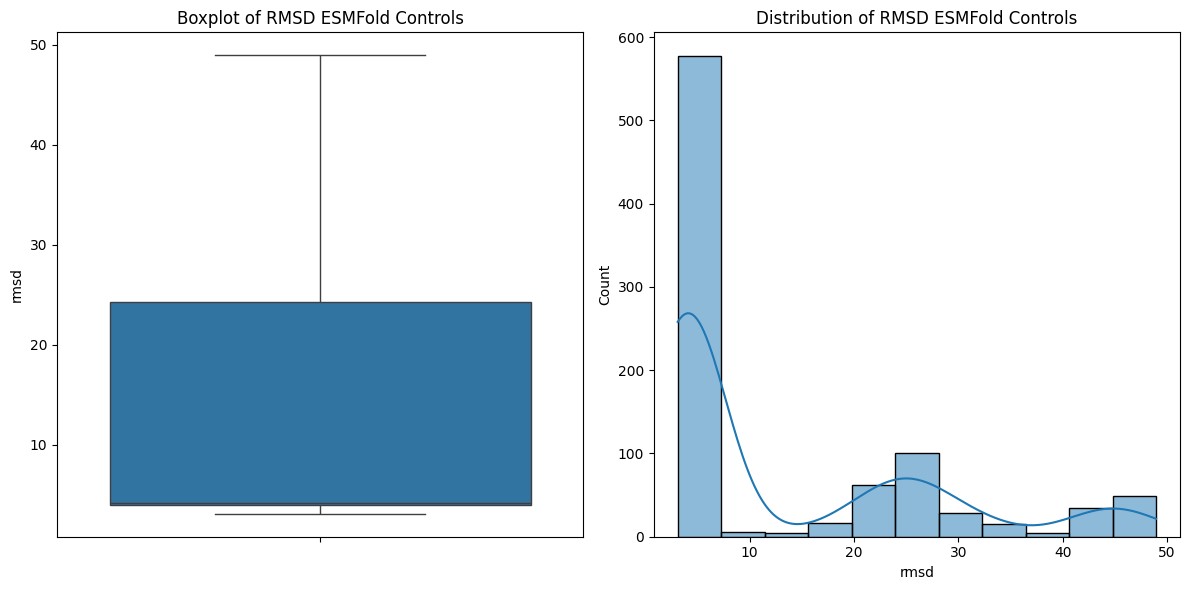

In [9]:
# Plotting RMSD distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['rmsd'])
plt.title('Boxplot of RMSD ESMFold Controls')

plt.subplot(1, 2, 2)
sns.histplot(df['rmsd'], kde=True)
plt.title('Distribution of RMSD ESMFold Controls')

plt.tight_layout()
plt.show()

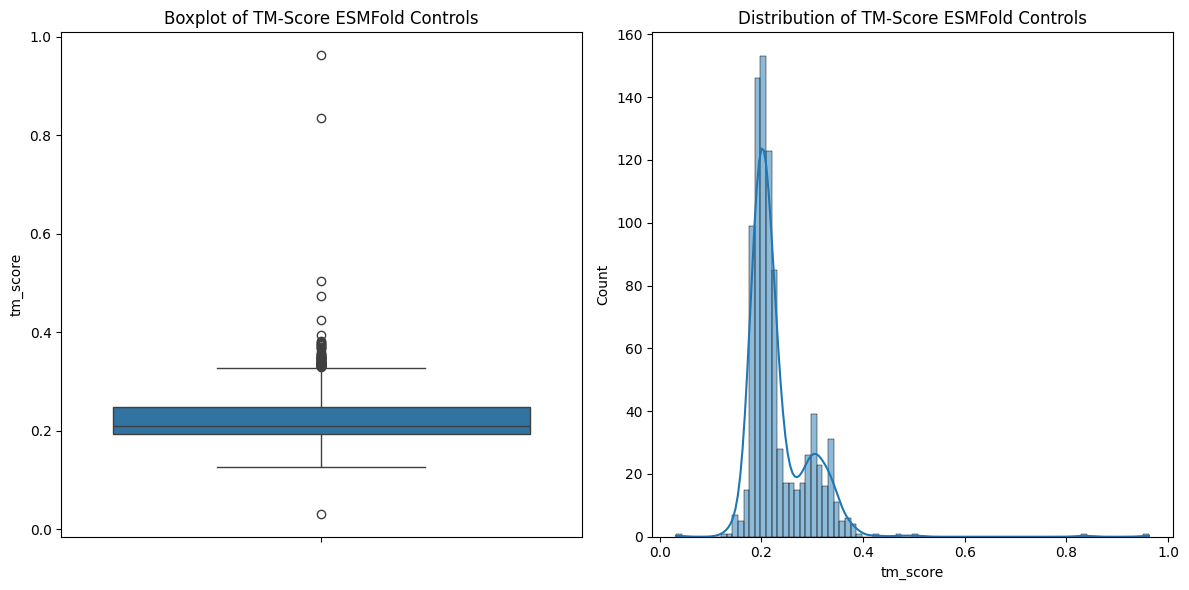

In [10]:
# Plotting TM-Score distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['tm_score'])
plt.title('Boxplot of TM-Score ESMFold Controls')

plt.subplot(1, 2, 2)
sns.histplot(df['tm_score'], kde=True)
plt.title('Distribution of TM-Score ESMFold Controls')

plt.tight_layout()
plt.show()

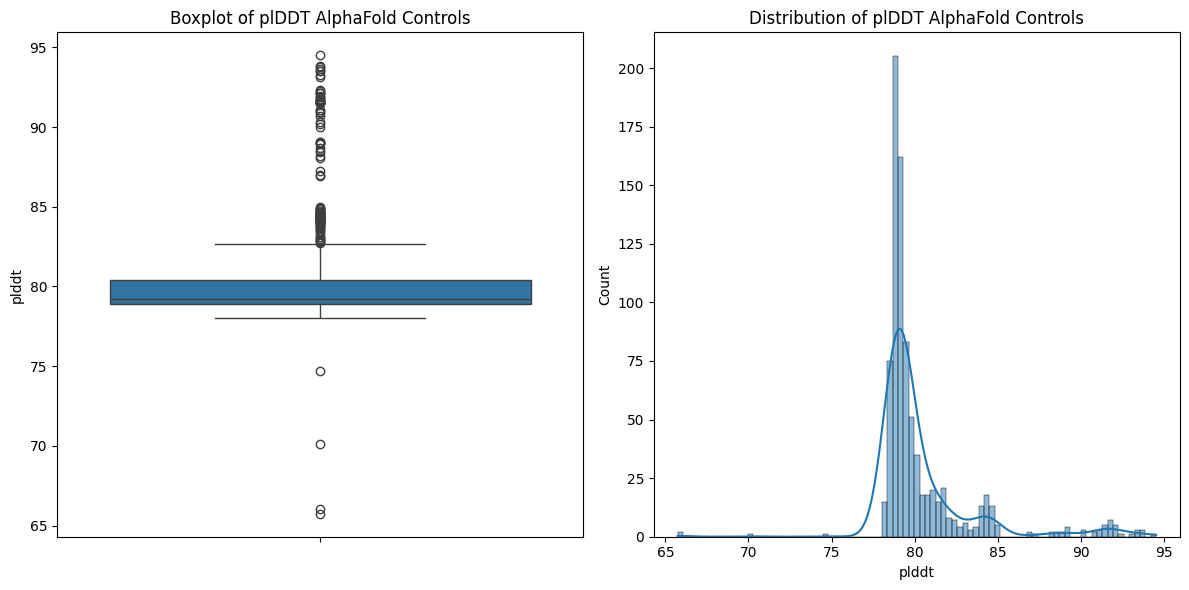

In [23]:
# Plotting TM-Score distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['plddt'])
plt.title('Boxplot of plDDT AlphaFold Controls')

plt.subplot(1, 2, 2)
sns.histplot(df['plddt'], kde=True)
plt.title('Distribution of plDDT AlphaFold Controls')

plt.tight_layout()
plt.show()

In [25]:
def plot_paired_metrics(df, col1, col2, label1, label2):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=[df[col1], df[col2]], orient='v')
    plt.xticks([0, 1], [label1, label2])
    plt.title(f'Boxplot of {label1} and {label2} AlphaFold')

    plt.subplot(1, 2, 2)
    sns.histplot(df[col1], kde=True, color='blue', label=label1, alpha=0.6)
    sns.histplot(df[col2], kde=True, color='orange', label=label2, alpha=0.6)
    plt.legend()
    plt.title(f'Distribution of {label1} and {label2} AlphaFold')

    plt.tight_layout()
    plt.show()

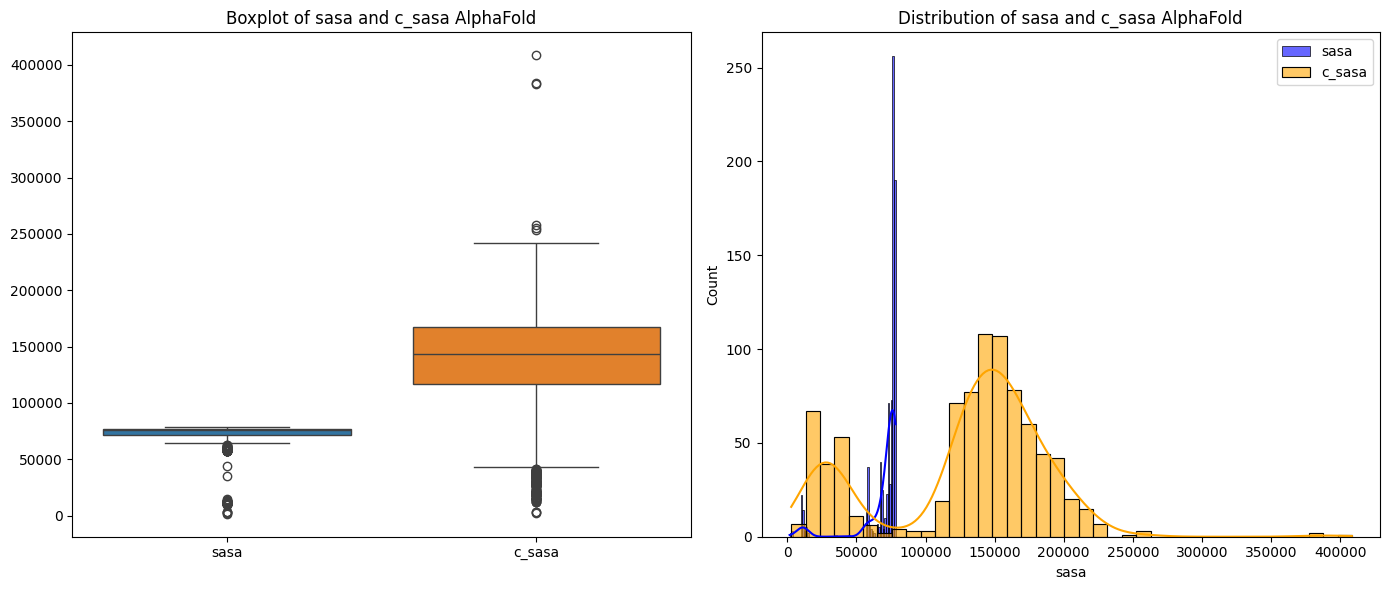

In [26]:
plot_paired_metrics(df, 'sasa', 'c_sasa', 'sasa', 'c_sasa')

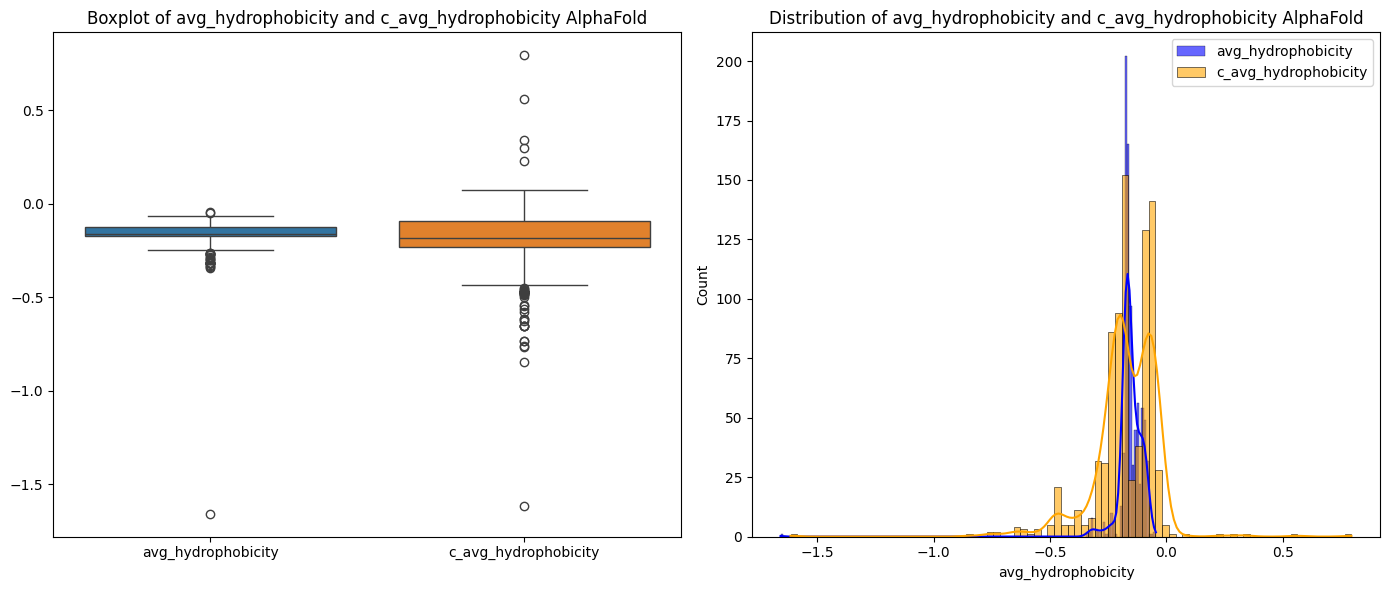

In [27]:
plot_paired_metrics(df, 'avg_hydrophobicity', 'c_avg_hydrophobicity', 'avg_hydrophobicity', 'c_avg_hydrophobicity')

In [10]:
from IPython.display import display

In [14]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
descriptive_stats = descriptive_stats.round(3)
display(descriptive_stats)

,rmsd,tm_score,sasa,plddt,avg_hydrophobicity,c_sasa,c_b_factor,c_avg_hydrophobicity
count,850.000,850.000,850.000,850.000,850.000,850.000,850.000,844.000
mean,12.944,0.817,69924.329,80.364,-0.155,129410.401,107.165,-0.175
std,12.753,0.205,16021.362,3.105,0.067,60129.528,74.348,0.142
min,3.076,0.032,1645.999,65.744,-1.657,2789.563,0.000,-1.614
25%,4.077,0.795,71626.749,78.880,-0.174,117045.896,60.554,-0.228
50%,4.363,0.893,76172.484,79.208,-0.160,143369.628,92.225,-0.183
75%,25.045,0.956,77097.727,80.423,-0.125,167162.857,137.756,-0.090
max,44.252,0.991,78312.801,94.500,-0.045,408544.000,649.435,0.795


In [15]:
descriptive_stats.to_csv('/Users/maxvandenboom/stayahead/analysis/datasets/references/controls/descriptive_stats_AF.csv')

In [55]:
dir_path = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1/rankings'
output_file = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/rank_stats_train_1.csv'
import os
results = []
for file in os.listdir(dir_path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir_path, file))
        name = os.path.splitext(file)[0]
        type = name.split('_')[-1]
        al_type = name.split('_')[0]
        v_type = name.split('_')[1]
        if type == 'deltas':
            mean_delta_bind_rank = df['rank_diff_delta_bind'].mean()
            mean_delta_expr_rank = df['rank_diff_delta_expr'].mean()
        mean_bind_rank = df['rank_diff_bind'].mean()
        mean_expr_rank = df['rank_diff_expr'].mean()
        id = al_type + '_' + v_type
        if type == 'deltas':
            results.append([id, mean_bind_rank, mean_expr_rank, mean_delta_bind_rank, mean_delta_expr_rank])
        else:
            results.append([id, mean_bind_rank, mean_expr_rank, 'NA', 'NA'])
    
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'mean_bind_rank', 'mean_expr_rank', 'mean_delta_bind_rank', 'mean_delta_expr_rank'])
        writer.writerows(results)
        

In [17]:
mean_bind_rank = df['rank_diff_bind'].mean()
mean_delta_bind_rank = df['rank_diff_delta_bind'].mean()
mean_expr_rank = df['rank_diff_expr'].mean()
mean_delta_expr_rank = df['rank_diff_delta_expr'].mean()
print(mean_bind_rank, mean_delta_bind_rank, mean_expr_rank, mean_delta_expr_rank)

0.0 0.0 0.0 0.0


In [18]:
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train/AF_BA1_100_predict_deltas.csv')

In [39]:
df = df.sort_values(by='predicted_bind', ascending=False)
df_pred_bind = df[['seq_id', 'predicted_bind']]

In [40]:
df = df.sort_values(by='bind', ascending=False)
df_bind = df[['seq_id', 'bind']]

In [41]:
df_bind['rank'] = range(1, len(df_bind) + 1)

/var/folders/mh/w45hs15d1ysft1pnb5mdmq4c0000gn/T/ipykernel_91272/3473146212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bind['rank'] = range(1, len(df_bind) + 1)


In [42]:
df_pred_bind['rank'] = range(1, len(df_pred_bind) + 1)

In [38]:
df_bind

,seq_id,bind,rank
11,Y121F,10.43431,1
63,R161T,10.22050,2
17,P195M,9.44156,3
73,F43R,9.36270,4
86,N62V,9.28895,5
...,...,...,...
34,C156V,6.23644,96
92,Y163K,6.22491,97
68,Y163I,6.13779,98
25,G170H,5.81547,99


In [44]:
# Merge the two DataFrames on 'seq_id'
merged_df = pd.merge(df_bind, df_pred_bind, on='seq_id', suffixes=('_bind', '_pred_bind'))

# Calculate the difference in rank
merged_df['diff_rank'] = merged_df['rank_pred_bind'] - merged_df['rank_bind']

# Create a new DataFrame with 'seq_id' and 'diff_rank'
result_df = merged_df[['seq_id', 'diff_rank']]

In [51]:
result_df.to_csv('/Users/maxvandenboom/stayahead/analysis/datasets/tmp/AF_rank_BA1_bind_test.csv', index=False)

In [47]:
mean_diff_rank = result_df['diff_rank'].mean()
print(f"The mean of diff_rank is: {mean_diff_rank}")

The mean of diff_rank is: 0.0
